# Import Libraries

In [1]:
import sys                                                  # Read system parameters.
import numpy as np                                          # Work with multi-dimensional arrays.
import pandas as pd                                         # Manipulate and analyze data.
import matplotlib                                           # Create and format charts.
import matplotlib.pyplot as plt  
import seaborn as sns                                       # Make charting easier.

import warnings                                             # Suppress warnings.
warnings.filterwarnings('ignore')

print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- Seaborn {}'.format(sns.__version__))

Libraries used in this project:
- Python 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
- NumPy 1.26.1
- pandas 1.5.3
- Matplotlib 3.8.0
- Seaborn 0.11.2


# Load the Dataset

In [2]:
users_data = pd.read_pickle('C:/Users/Hamad/--TRAINING--/AI_Bootcamp/CDSP/2-Analysis/data/users_data_cleaned.pickle')
users_data

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.0,58,management,married,tertiary,False,True,False,None,261,1,-1,0,None,False,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,NaN,NaN,44,technician,single,secondary,False,True,False,None,151,1,-1,0,None,False,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.0,33,entrepreneur,married,secondary,False,True,True,None,76,1,-1,0,None,False,2002-06-04,mobile
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,NaN,NaN,47,blue-collar,married,None,False,True,False,None,92,1,-1,0,None,False,1995-06-29,tablet
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.0,33,None,single,None,False,False,False,None,198,1,-1,0,None,False,1995-08-01,mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45211,a218c1d6-880a-4431-a314-a1bd3dc36b21,2.0,825.0,51,technician,married,tertiary,False,False,False,cellular,977,3,-1,0,None,True,2002-12-28,desktop
45212,6a6bf402-9416-4e71-97c6-727e8298a3a5,4.0,1729.0,71,retired,divorced,primary,False,False,False,cellular,456,2,-1,0,None,True,2010-11-18,desktop
45213,be32ba96-b178-4b54-b32a-f75b714793df,2.0,5715.0,72,retired,married,secondary,False,False,False,cellular,1127,5,184,3,success,True,1996-06-18,mobile
45214,44623a48-4e9b-48fd-b155-a17d1c06a754,NaN,NaN,57,blue-collar,married,secondary,False,False,False,telephone,508,4,-1,0,None,False,1996-09-14,desktop


# Check the Shape of the Dataset

In [3]:
print(f'The shape of the dataset : {users_data.shape}.')

The shape of the dataset : (45209, 19).


# Check the Number of Unique Users

In [4]:
print(f'The number of users in the dataset        : {users_data.shape[0]}.')
print(f'The number of user ids that are unique    : {len(np.unique(users_data.user_id))}.')
print(f'Check if all user ids are unique          : {len(np.unique(users_data.user_id)) == users_data.shape[0]}.')
print(f'The number of Null values in the user ids : {users_data.user_id.isnull().sum()}.')

The number of users in the dataset        : 45209.
The number of user ids that are unique    : 45209.
Check if all user ids are unique          : True.
The number of Null values in the user ids : 0.


# Check the Data Types

In [5]:
dtyptes_dic = users_data.columns.to_series().groupby(users_data.dtypes).groups

for i in dtyptes_dic.keys():
    print(i, ':')
    for j in dtyptes_dic[i]:
        print(j, end=" ")
    print('\n')

bool :
default housing loan term_deposit 

int64 :
age duration campaign pdays previous 

float64 :
number_transactions total_amount_usd 

datetime64[ns] :
date_joined 

object :
user_id job marital education contact poutcome device 



# Print the Basic Information of the Dataset

In [6]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45209 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45209 non-null  object        
 1   number_transactions  35210 non-null  float64       
 2   total_amount_usd     35210 non-null  float64       
 3   age                  45209 non-null  int64         
 4   job                  44921 non-null  object        
 5   marital              45209 non-null  object        
 6   education            43352 non-null  object        
 7   default              45209 non-null  bool          
 8   housing              45209 non-null  bool          
 9   loan                 45209 non-null  bool          
 10  contact              32191 non-null  object        
 11  duration             45209 non-null  int64         
 12  campaign             45209 non-null  int64         
 13  pdays                45209 non-

# Generate Summary Statistics for all of the Dataset

In [9]:
users_data.describe(datetime_is_numeric = True, include = 'all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
user_id,45209,45209,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_transactions,35210.0,NaN,NaN,NaN,3.977052,1.0,2.0,3.0,4.0,20.0,3.814329
total_amount_usd,35210.0,NaN,NaN,NaN,1369.417751,-8019.0,73.0,451.0,1438.0,102127.0,3063.412688
age,45209.0,NaN,NaN,NaN,40.935853,18.0,33.0,39.0,48.0,95.0,10.618653
job,44921,11,blue-collar,9731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45209,3,married,27212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,43352,3,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45209,2,False,44394,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,45209,2,True,25128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45209,2,False,37965,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Generate Summary Statistics for numerical Data only

In [10]:
users_data.describe()

,number_transactions,total_amount_usd,age,duration,campaign,pdays,previous
count,35210.000000,35210.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000
mean,3.977052,1369.417751,40.935853,258.153067,2.763897,40.199651,0.580349
std,3.814329,3063.412688,10.618653,257.525446,3.098076,100.130586,2.303489
min,1.000000,-8019.000000,18.000000,0.000000,1.000000,-1.000000,0.000000
25%,2.000000,73.000000,33.000000,103.000000,1.000000,-1.000000,0.000000
50%,3.000000,451.000000,39.000000,180.000000,2.000000,-1.000000,0.000000
75%,4.000000,1438.000000,48.000000,319.000000,3.000000,-1.000000,0.000000
max,20.000000,102127.000000,95.000000,4918.000000,63.000000,871.000000,275.000000


# Generate Mode values for all data
- Do not forget to drop the id column.

In [11]:
mode = users_data.drop(['user_id'], axis = 1, inplace = False).mode().T
mode = mode.rename(columns = {0 : 'Mode'})
mode.iloc[:, 0:1]

,Mode
number_transactions,2.0
total_amount_usd,0.0
age,32.0
job,blue-collar
marital,married
education,secondary
default,False
housing,True
loan,False
contact,cellular


# Generate Skewness and Kurtosis Measurements

In [12]:
pd.DataFrame(users_data.skew(), columns=['Skewness'])

,Skewness
number_transactions,2.704543
total_amount_usd,8.596128
age,0.684861
default,7.245206
housing,-0.224686
loan,1.852545
duration,3.144556
campaign,4.898555
pdays,2.615635
previous,41.845672


In [13]:
pd.DataFrame(users_data.kurt(), columns=['Kurtosis'])

,Kurtosis
number_transactions,6.659034
total_amount_usd,150.790967
age,0.319760
default,50.495241
housing,-1.949602
loan,1.431987
duration,18.155941
campaign,39.248145
pdays,6.934713
previous,4506.684640


# Plot Histograms for all Numerical Columns

- Use Seaborn only.
- Select all numerical columns.
- Customize the plot
    1. Use set function with a style.
    2. Use a subplot, with 7 rows and 1 column, figsize is 10 by (6 * number of numerical columns).
- kde is False, fontsize of the titles is 14, and fontsize of labels is 12.

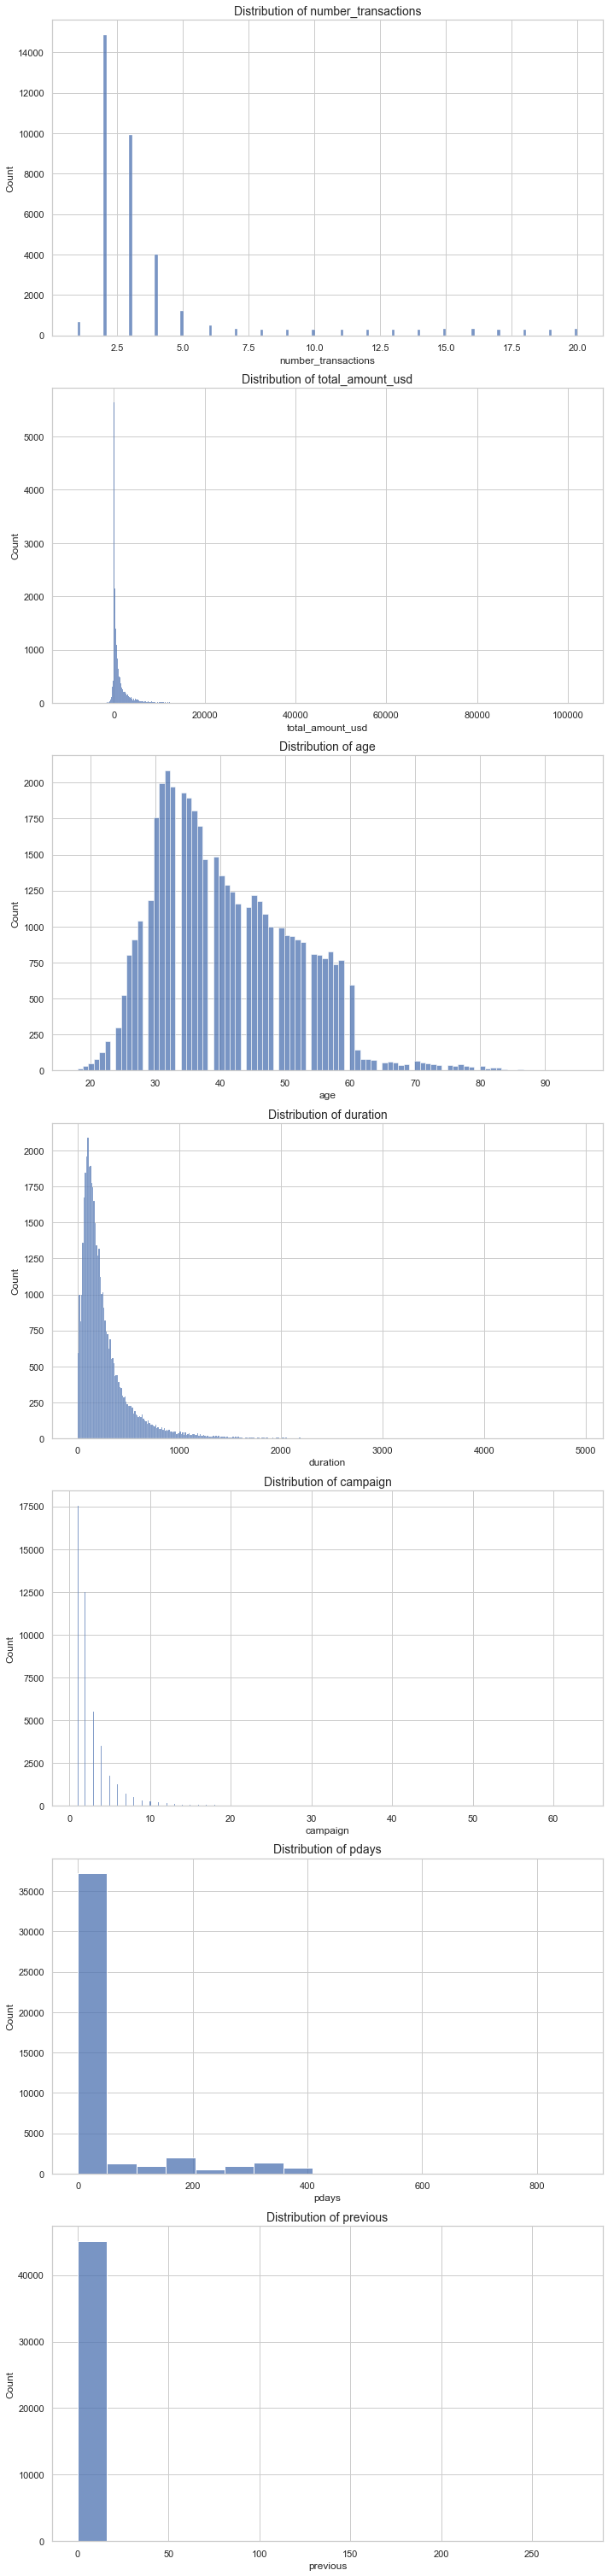

In [14]:
users_data_for_hist = users_data.select_dtypes(include=['float64', 'int64'])

sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=len(users_data_for_hist.columns), ncols=1, figsize=(10, 6 * len(users_data_for_hist.columns)))

for i, column in enumerate(users_data_for_hist.columns):
    sns.histplot(users_data_for_hist[column], kde=False, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}', fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show();

# Generate a box plot for age

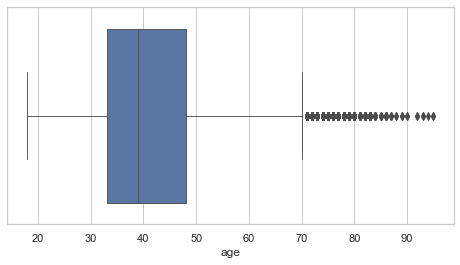

In [15]:
plt.figure(figsize = (8, 4))
sns.boxplot(x = users_data['age'], linewidth = 0.9);

# Generate a violin plot for age

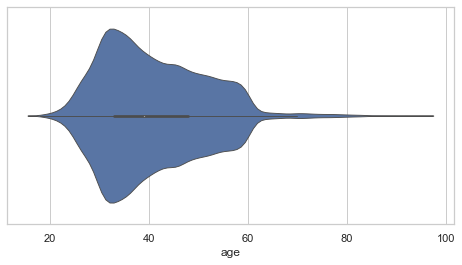

In [16]:
plt.figure(figsize = (8, 4))
sns.violinplot(x = users_data['age'], linewidth = 0.9);

# Generate a box plot for number_transactions

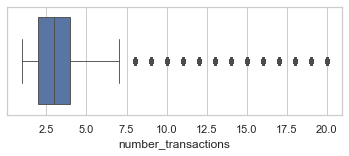

In [17]:
plt.figure(figsize = (6, 2))
sns.boxplot(x = users_data['number_transactions'], linewidth = 0.9);

# Generate a violin plot for number_transactions

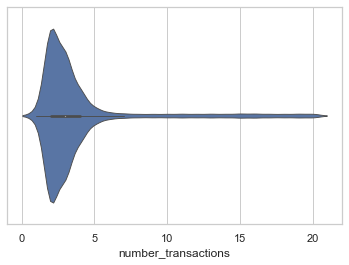

In [18]:
sns.violinplot(x = users_data['number_transactions'], linewidth=0.9);

# Generate scatter plots comparing total_amount_usd to number_transactions

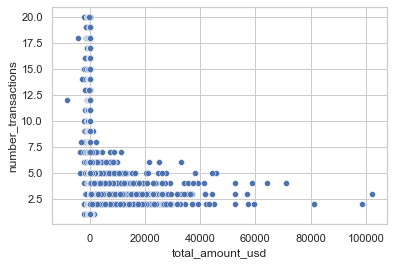

In [19]:
sns.scatterplot(
    data = users_data,
    x = 'total_amount_usd',
    y = 'number_transactions'
);

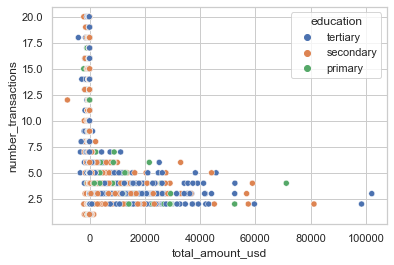

In [20]:
sns.scatterplot(
    data = users_data,
    x = 'total_amount_usd',
    y = 'number_transactions',
    hue = 'education'
);

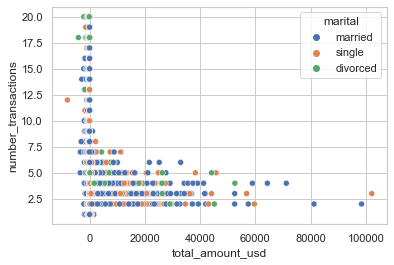

In [21]:
sns.scatterplot(data = users_data, x = 'total_amount_usd', y = 'number_transactions', hue = 'marital');

# Generate a line plot for total_amount_usd

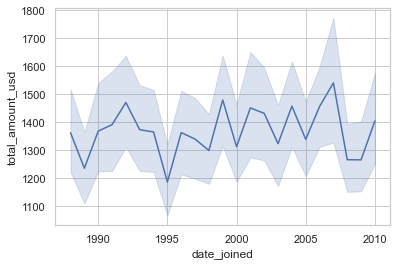

In [22]:
years = users_data['date_joined'].dt.year

sns.lineplot(data = users_data, x = years, y = 'total_amount_usd', estimator = np.mean);

# Generate bar charts for job

In [23]:
users_job_dist = users_data['job'].value_counts()
users_job_dist

blue-collar      9731
management       9457
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64

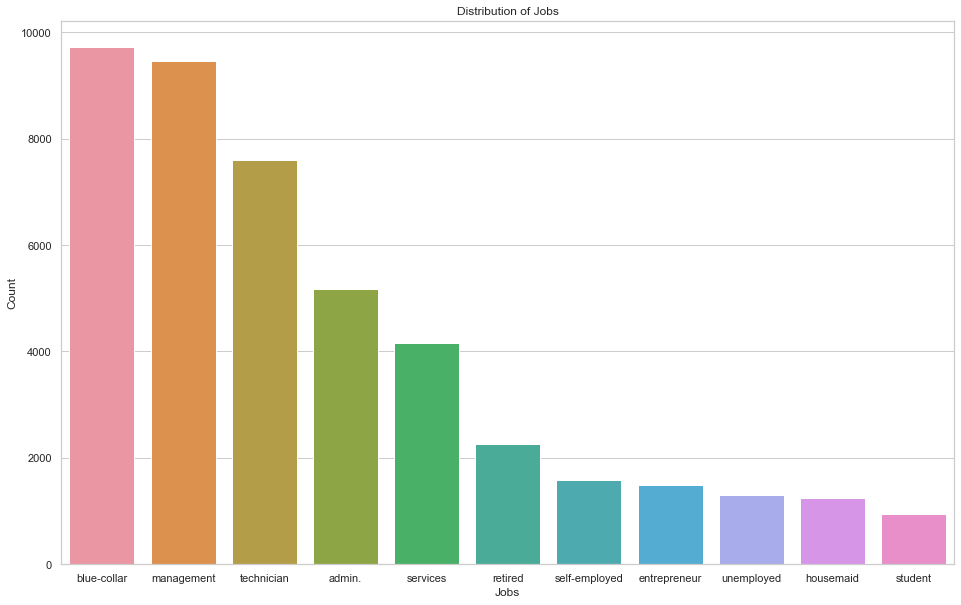

In [24]:
# Customize the plot
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

# Create the bar plot
sns.barplot(x=users_job_dist.index, y=users_job_dist.values.flatten())
plt.title('Distribution of Jobs')
plt.xlabel('Jobs')
plt.ylabel('Count')

plt.show();

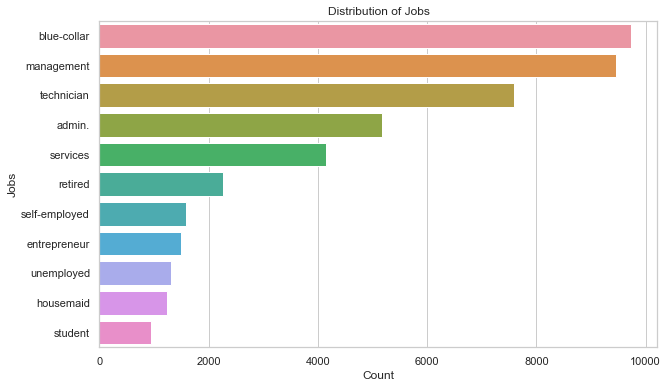

In [25]:
# Customize the plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create the horizontal bar plot
sns.barplot(x=users_job_dist.values.flatten(), y=users_job_dist.index, orient='h')
plt.title('Distribution of Jobs')
plt.xlabel('Count')
plt.ylabel('Jobs')

plt.show();

# Generate a bar chart for marital

In [26]:
users_marital_dist = users_data['marital'].value_counts()
users_marital_dist

married     27212
single      12790
divorced     5207
Name: marital, dtype: int64

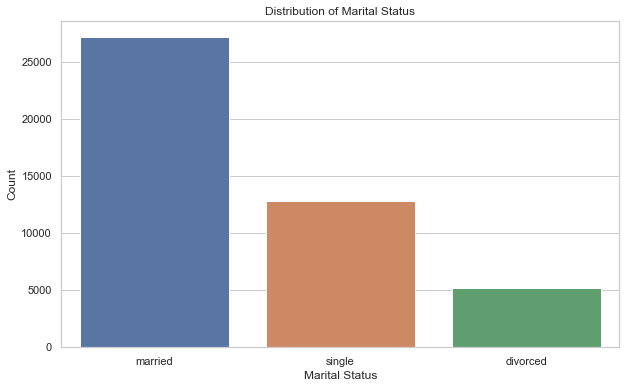

In [27]:
# Customize the plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(x=users_marital_dist.index, y=users_marital_dist.values.flatten())
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')

plt.show();

# Generate a bar chart for education

In [28]:
users_education_dist = users_data['education'].value_counts()
users_education_dist

secondary    23202
tertiary     13300
primary       6850
Name: education, dtype: int64

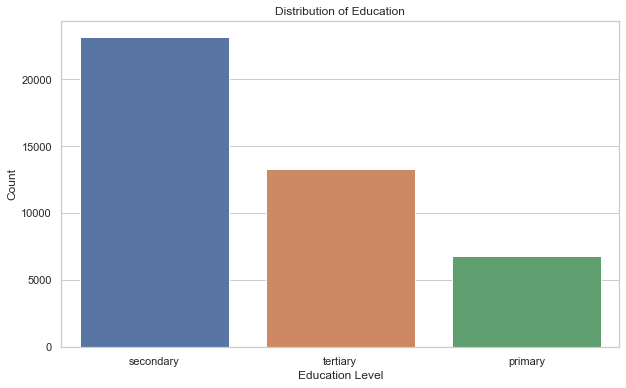

In [29]:
# Customize the plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(x=users_education_dist.index, y=users_education_dist.values.flatten())
plt.title('Distribution of Education')
plt.xlabel('Education Level')
plt.ylabel('Count')

plt.show();

# Generate a bar chart for contact

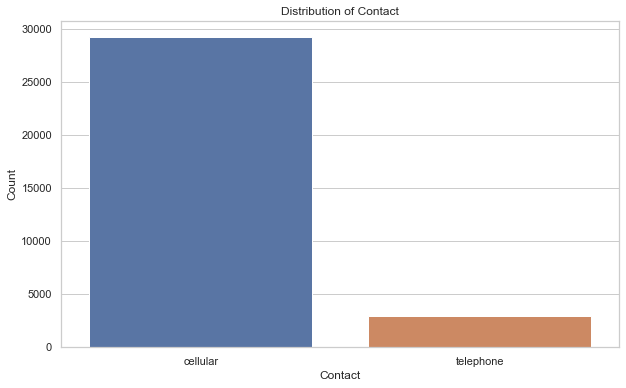

In [30]:
users_contact_dist = users_data['contact'].value_counts()

# Customize the plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(x=users_contact_dist.index, y=users_contact_dist.values.flatten())
plt.title('Distribution of Contact')
plt.xlabel('Contact')
plt.ylabel('Count')

plt.show();

# Generate a bar chart for poutcome

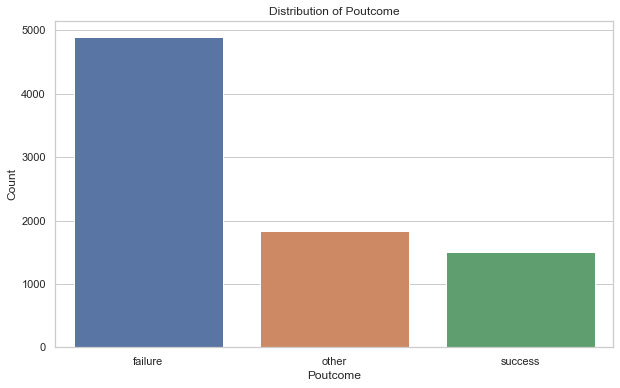

In [31]:
users_poutcome_dist = users_data['poutcome'].value_counts()

# Customize the plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(x=users_poutcome_dist.index, y=users_poutcome_dist.values.flatten())
plt.title('Distribution of Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Count')

plt.show();

# Generate a bar chart for default

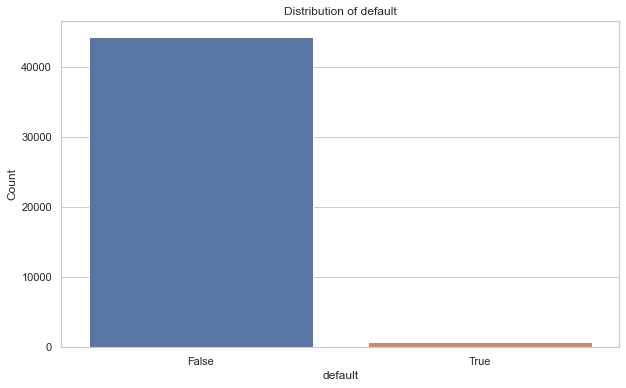

In [34]:
users_device_dist = users_data['default'].value_counts()

# Customize the plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(x=users_device_dist.index, y=users_device_dist.values.flatten())
plt.title('Distribution of default')
plt.xlabel('default')
plt.ylabel('Count')

plt.show();

# Generate a bar chart for device

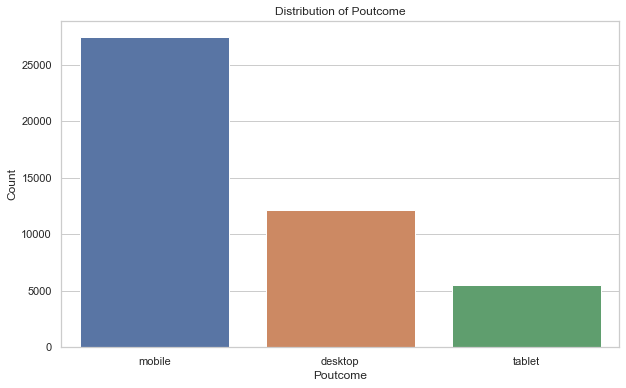

In [35]:
users_device_dist = users_data['device'].value_counts()

# Customize the plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(x=users_device_dist.index, y=users_device_dist.values.flatten())
plt.title('Distribution of Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Count')

plt.show();

# Generate a heatmap for the feature correlations

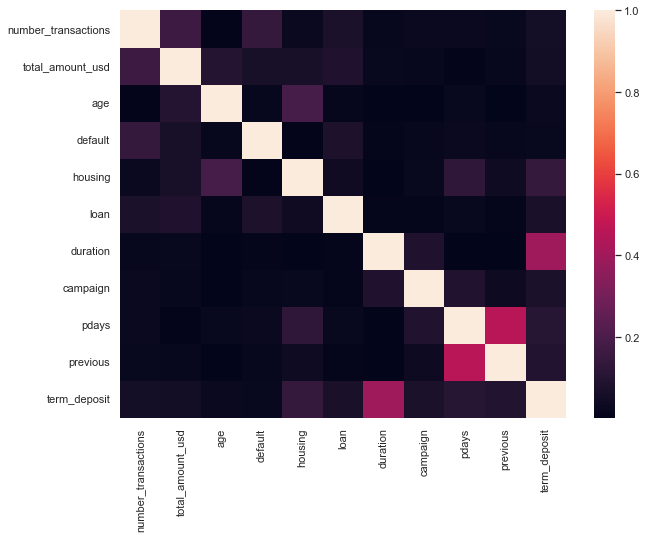

In [36]:
# Abs method make negative numbers positive.
corr_matrix = users_data.corr().abs()
fig = plt.figure(figsize = (10, 7.5))
sns.heatmap(corr_matrix);

# Identify missing values

In [37]:
print(f'The number of rows     {users_data.shape[0]}\n****************************')
users_data.isnull().sum()

The number of rows     45209
****************************


user_id                    0
number_transactions     9999
total_amount_usd        9999
age                        0
job                      288
marital                    0
education               1857
default                    0
housing                    0
loan                       0
contact                13018
duration                   0
campaign                   0
pdays                      0
previous                   0
poutcome               36957
term_deposit               0
date_joined               30
device                    94
dtype: int64

# Identify the percentage of missing values for each feature

In [38]:
percent_missing = (users_data.isnull().mean() * 100).round(2)
percent_missing

user_id                 0.00
number_transactions    22.12
total_amount_usd       22.12
age                     0.00
job                     0.64
marital                 0.00
education               4.11
default                 0.00
housing                 0.00
loan                    0.00
contact                28.80
duration                0.00
campaign                0.00
pdays                   0.00
previous                0.00
poutcome               81.75
term_deposit            0.00
date_joined             0.07
device                  0.21
dtype: float64

# Complete the following function

- Generate a missing value report

In [39]:
def missing_value_pct_df(data):
    """Create a DataFrame to summarize missing values."""
    
    percent_missing = data.isnull().mean() 
    missing_value_df = pd.DataFrame(percent_missing).reset_index()
    
    missing_value_df = missing_value_df.rename(columns = {'index': 'column_name', 0: 'percent_missing'})

    # Multiply by 100 and round to 2 decimal places.
    missing_value_df['percent_missing'] = missing_value_df['percent_missing'].apply(lambda x: round(x * 100, 2)) 

    # Sort the dataframe.
    missing_value_df = missing_value_df.sort_values(by = ['percent_missing'], ascending = False)

    return missing_value_df

In [40]:
missing_value_df = missing_value_pct_df(users_data)
missing_value_df

,column_name,percent_missing
15,poutcome,81.75
10,contact,28.80
2,total_amount_usd,22.12
1,number_transactions,22.12
6,education,4.11
4,job,0.64
18,device,0.21
17,date_joined,0.07
12,campaign,0.00
16,term_deposit,0.00


# Remove features with a high percentage of missing values

- Put a threshold

In [41]:
threshold = 60

cols_to_drop = list(missing_value_df[missing_value_df['percent_missing'] > threshold]['column_name'])

print('Number of features to drop:', missing_value_df[missing_value_df['percent_missing'] > threshold].shape[0])
print(f'Features with missing values greater than {threshold}%:', cols_to_drop)

Number of features to drop: 1
Features with missing values greater than 60%: ['poutcome']


In [42]:
users_data_cleaned = users_data.drop(cols_to_drop, axis = 1)

missing_value_df = missing_value_pct_df(users_data_cleaned)
missing_columns = list(missing_value_df[missing_value_df['percent_missing'] > 0]['column_name'])
print(f'After dropping {cols_to_drop} column(s), number of features with missing values: {len(missing_columns)}.')

After dropping ['poutcome'] column(s), number of features with missing values: 7.


In [43]:
print('The columns that have missing values :')
pd.DataFrame(missing_columns, columns = ['Column_name'])

The columns that have missing values :


,Column_name
0,contact
1,total_amount_usd
2,number_transactions
3,education
4,job
5,device
6,date_joined


# Identify numerical data with missing values

In [44]:
dtypes = ['int64', 'float64']
numerical_columns = list(users_data_cleaned.select_dtypes(dtypes).columns)
numerical_missing_columns = list(set(numerical_columns).intersection(missing_columns))
print('Numerical features with missing values:', numerical_missing_columns)
pd.DataFrame(numerical_missing_columns, columns = ['Numerical_columns'])

Numerical features with missing values: ['number_transactions', 'total_amount_usd']


,Numerical_columns
0,number_transactions
1,total_amount_usd


# Impute missing data values for total_amount_usd

In [45]:
users_data_cleaned['total_amount_usd'].isnull().sum()

9999

In [46]:
# Print mean of total_amount_usd.
tot_amt_usd_mean = round(users_data_cleaned['total_amount_usd'].mean(), 2)
print('Mean total_amount_usd:', tot_amt_usd_mean)

# Impute missing values for total_amount_usd with mean.
users_data_cleaned['total_amount_usd'].fillna(tot_amt_usd_mean, inplace = True)

Mean total_amount_usd: 1369.42


In [47]:
users_data_cleaned['total_amount_usd'].isnull().sum()

0

# Replace missing values for number_transactions with 0

In [48]:
users_data_cleaned['number_transactions'].isnull().sum()

9999

In [49]:
users_data_cleaned['number_transactions'].fillna(0, inplace = True)

In [50]:
users_data_cleaned['number_transactions'].isnull().sum()

0

# Identify categorical data with missing values

In [51]:
dtypes = ['object', 'bool']
nonnumbers_columns = list(users_data_cleaned.select_dtypes(dtypes).columns)
categorical_columns = list(set(nonnumbers_columns).intersection(missing_columns))

print(f'Object and boolean type features ({len(nonnumbers_columns)}) :\n\n{nonnumbers_columns}')
print('\n\n\n*************************************************************************************************************\n\n\n')
print(f'Categorical features with missing values ({len(categorical_columns)}) :\n\n{categorical_columns}')

Object and boolean type features (10) :

['user_id', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'term_deposit', 'device']



*************************************************************************************************************



Categorical features with missing values (4) :

['contact', 'education', 'device', 'job']


# Deal with categorical missing values

- Use 'Unkown' replace value or Mode method (imputation).
- It depends on the insights you have find before in the data visualization.

In [52]:
print('Device', users_data_cleaned['device'].isnull().sum())
print('Education', users_data_cleaned['education'].isnull().sum())
print('Contact', users_data_cleaned['contact'].isnull().sum())
print('Job', users_data_cleaned['job'].isnull().sum())

Device 94
Education 1857
Contact 13018
Job 288


In [53]:
users_data_cleaned['device'].fillna('Unknown', inplace = True)
users_data_cleaned['education'].fillna('Unknown', inplace = True)
users_data_cleaned['contact'].fillna('Unknown', inplace = True)
users_data_cleaned['job'].fillna('Unknown', inplace = True)

In [54]:
for i in categorical_columns:
    print('************************', i.upper(), '************************')
    print(users_data_cleaned[i].value_counts())
    print('\n')

************************ CONTACT ************************
cellular     29285
Unknown      13018
telephone     2906
Name: contact, dtype: int64


************************ EDUCATION ************************
secondary    23202
tertiary     13300
primary       6850
Unknown       1857
Name: education, dtype: int64


************************ DEVICE ************************
mobile     27504
desktop    12112
tablet      5499
Unknown       94
Name: device, dtype: int64


************************ JOB ************************
blue-collar      9731
management       9457
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Unknown           288
Name: job, dtype: int64




In [55]:
print('Device', users_data_cleaned['device'].isnull().sum())
print('Education', users_data_cleaned['education'].isnull().sum())
print('Contact', users_data_cleaned['contact'].isnull().sum())
print('Job', users_data_cleaned['job'].isnull().sum())

Device 0
Education 0
Contact 0
Job 0


# Check if there are any other missing values

In [56]:
missing_value_df = missing_value_pct_df(users_data_cleaned)
missing_columns = list(missing_value_df[missing_value_df['percent_missing'] > 0]['column_name'])

print('Number of features with missing values:', len(missing_columns))
print('Features with missing values:', missing_columns)

Number of features with missing values: 1
Features with missing values: ['date_joined']


# Remove all rows where date_joined is missing

In [57]:
users_data_cleaned.shape[0]

45209

In [58]:
print('Number of users with corrupted data:', users_data_cleaned[users_data_cleaned['date_joined'].isnull()].shape[0])

Number of users with corrupted data: 30


In [59]:
# Remove corrupted data.
users_data_cleaned = users_data_cleaned[users_data_cleaned['date_joined'].notnull()]

In [60]:
# Check to see if any corrupted rows remain.
print('Number of users with corrupted data:', users_data_cleaned[users_data_cleaned['date_joined'].isnull()].shape[0])

Number of users with corrupted data: 0


In [61]:
users_data_cleaned.shape[0]

45179

# Perform one last check for missing values

In [62]:
missing_value_df = missing_value_pct_df(users_data_cleaned)
missing_columns = list(missing_value_df[missing_value_df['percent_missing'] > 0]['column_name'])

print('Number of features with missing values:', len(missing_columns))

Number of features with missing values: 0
